<a href="https://colab.research.google.com/github/gabyxsantos/Economia/blob/Modificacoes-gaby/trabalho_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TÍTULO**

In [1]:
!pip install --upgrade --force-reinstall numpy
!pip install "pandas>=2.0,<2.3" --upgrade
!pip install babypandas --no-deps
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 111.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependen

In [2]:
import numpy as np
import babypandas as bpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##**1. Bases de Dados**

In [18]:
url_selic = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/base_de_dados/Selic.csv"
dados_selic = pd.read_csv(url_selic, sep=";")

dados_selic = dados_selic.rename(columns ={
    "Taxa de juros nominal - Over / Selic - (% a.a.) - Banco Central do Brasil, Boletim, Seção mercado financeiro e de capitais (Bacen/Boletim/M. Finan.) - PAN12_TJOVER12" : "Taxa Selic"
})
dados_selic = dados_selic.drop('Unnamed: 2', axis=1)
dados_selic['Taxa Selic'] = dados_selic['Taxa Selic'].astype(str)
dados_selic['Taxa Selic'] = dados_selic['Taxa Selic'].str.replace(',', '.', regex=True)
dados_selic['Taxa Selic'] = pd.to_numeric(dados_selic['Taxa Selic'], errors='coerce')
dados_selic

,Data,Taxa Selic
0,1974.01,18.997626
1,1974.02,14.707191
2,1974.03,14.843349
3,1974.04,15.526362
4,1974.05,15.937956
...,...,...
612,2025.01,12.816456
613,2025.02,12.548696
614,2025.03,12.148147
615,2025.04,13.488414


In [4]:
url_desocupacaoIdade = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/base_de_dados/desocupacaoIdade.csv"
dados_desocupacaoIdade = pd.read_csv(url_desocupacaoIdade, sep=";", skiprows=1, header=None)
dados_desocupacaoIdade = dados_desocupacaoIdade.drop(index=7, columns=1)
dados_desocupacaoIdade

,0,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
0,Grupo de idade,1º trimestre 2012,2º trimestre 2012,3º trimestre 2012,4º trimestre 2012,1º trimestre 2013,2º trimestre 2013,3º trimestre 2013,4º trimestre 2013,1º trimestre 2014,...,4º trimestre 2022,1º trimestre 2023,2º trimestre 2023,3º trimestre 2023,4º trimestre 2023,1º trimestre 2024,2º trimestre 2024,3º trimestre 2024,4º trimestre 2024,1º trimestre 2025
1,14 a 17 anos,24.8,22.1,20.4,19.6,24.8,22.8,20.8,18.6,22.2,...,29,33.1,29.8,30.2,28.2,30.2,28.2,25.1,24.7,26.4
2,18 a 24 anos,16.1,15.3,14.1,13.8,16,15.1,14.7,12.8,15.3,...,16.4,18,16.6,16,15.3,16.8,14.3,13.4,12.9,14.9
3,25 a 39 anos,7.1,7,6.6,6.5,7.5,7.1,6.5,5.9,6.5,...,7.1,8.2,7.4,7,6.9,7.3,6.3,5.9,5.8,6.5
4,40 a 59 anos,4,3.6,3.6,3.4,4,3.8,3.4,3.2,3.7,...,5.3,5.6,5.3,5.1,4.9,5.2,4.6,4.1,4,4.7
5,60 anos ou mais,2.1,2.2,1.7,2,2.1,1.8,1.9,1.6,2.1,...,3.4,3.9,3.4,3.2,3.5,3.2,3.1,3,3,3.1
6,Total,8,7.6,7.1,6.9,8.1,7.5,7,6.3,7.2,...,7.9,8.8,8,7.7,7.4,7.9,6.9,6.4,6.2,7


In [5]:
url_desocupacaoSexo = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/base_de_dados/desocupacaoSexo.csv"
dados_desocupacaoSexo = pd.read_csv(url_desocupacaoSexo, sep=";", skiprows=1, header=None)
dados_desocupacaoSexo = dados_desocupacaoSexo.drop(index=4, columns=1)
dados_desocupacaoSexo

,0,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
0,Sexo,1º trimestre 2012,2º trimestre 2012,3º trimestre 2012,4º trimestre 2012,1º trimestre 2013,2º trimestre 2013,3º trimestre 2013,4º trimestre 2013,1º trimestre 2014,...,4º trimestre 2022,1º trimestre 2023,2º trimestre 2023,3º trimestre 2023,4º trimestre 2023,1º trimestre 2024,2º trimestre 2024,3º trimestre 2024,4º trimestre 2024,1º trimestre 2025
1,Homens,6.2,6.1,5.8,5.7,6.5,6,5.7,5.1,5.9,...,6.5,7.2,6.9,6.4,6,6.5,5.6,5.3,5.1,5.7
2,Mulheres,10.5,9.6,9,8.5,10.2,9.5,8.9,7.8,9,...,9.8,10.8,9.6,9.3,9.2,9.8,8.6,7.7,7.6,8.7
3,Total,8,7.6,7.1,6.9,8.1,7.5,7,6.3,7.2,...,7.9,8.8,8,7.7,7.4,7.9,6.9,6.4,6.2,7


In [6]:
url_txDesocupacao = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/base_de_dados/taxaDesocupacao.csv"
dados_txDesocupacao = pd.read_csv(url_txDesocupacao, sep=";", skiprows=1, header=None)
dados_txDesocupacao = dados_txDesocupacao.drop(index = 2)
dados_txDesocupacao

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
0,,jan-fev-mar 2012,fev-mar-abr 2012,mar-abr-mai 2012,abr-mai-jun 2012,mai-jun-jul 2012,jun-jul-ago 2012,jul-ago-set 2012,ago-set-out 2012,set-out-nov 2012,...,mai-jun-jul 2024,jun-jul-ago 2024,jul-ago-set 2024,ago-set-out 2024,set-out-nov 2024,out-nov-dez 2024,nov-dez-jan 2025,dez-jan-fev 2025,jan-fev-mar 2025,fev-mar-abr 2025
1,Brasil,8,7.8,7.7,7.6,7.5,7.4,7.1,7,6.8,...,6.8,6.6,6.4,6.2,6.1,6.2,6.5,6.8,7,6.6


In [7]:
url_rendMedio = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/base_de_dados/rendimentoMedio.csv"
dados_rendMedio = pd.read_csv(url_rendMedio, sep=";", skiprows=1, header=None)
dados_rendMedio = dados_rendMedio.drop(index = 2)
dados_rendMedio

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
0,,jan-fev-mar 2012,fev-mar-abr 2012,mar-abr-mai 2012,abr-mai-jun 2012,mai-jun-jul 2012,jun-jul-ago 2012,jul-ago-set 2012,ago-set-out 2012,set-out-nov 2012,...,mai-jun-jul 2024,jun-jul-ago 2024,jul-ago-set 2024,ago-set-out 2024,set-out-nov 2024,out-nov-dez 2024,nov-dez-jan 2025,dez-jan-fev 2025,jan-fev-mar 2025,fev-mar-abr 2025
1,Brasil,2999,3010,3002,3009,3024,3034,3029,3025,3022,...,3343,3360,3349,3368,3383,3397,3414,3427,3436,3426


In [8]:
import pandas as pd
import requests
from io import BytesIO

anos = range(2009, 2025)  # Ajuste os anos conforme necessário
base_url = "https://github.com/gabyxsantos/Economia/raw/main/base_de_dados/gastos{}.xlsx"

dfs = []

for ano in anos:
    url = base_url.format(ano)
    print(f"Lendo {ano}...")
    try:
        response = requests.get(url)
        df = pd.read_excel(BytesIO(response.content))
        df['Ano'] = ano
        dfs.append(df)
    except Exception as e:
        print(f"Erro ao ler {ano}: {e}")

# Junta todos os anos em um único DataFrame
df_final = pd.concat(dfs, ignore_index=True)

# Filtra só as despesas primárias
df_final = df_final[df_final['PRIMARIA_FINANCEIRA'] == 'Primária']

# Agrupa por ano e soma os pagamentos
gastos_por_ano = df_final.groupby('Ano')['PAGAMENTOS_TOTAIS'].sum().reset_index()
gastos_por_ano.columns = ['Ano', 'Gastos Primários (R$ bilhões)']

print(gastos_por_ano)


Lendo 2009...
Lendo 2010...
Lendo 2011...
Lendo 2012...
Lendo 2013...
Lendo 2014...
Lendo 2015...
Lendo 2016...
Lendo 2017...
Lendo 2018...
Lendo 2019...
Lendo 2020...
Lendo 2021...
Lendo 2022...
Lendo 2023...
Lendo 2024...
     Ano  Gastos Primários (R$ bilhões)
0   2009                   7.021818e+11
1   2010                   7.986640e+11
2   2011                   8.942526e+11
3   2012                   9.843979e+11
4   2013                   1.092414e+12
..   ...                            ...
11  2020                   2.187897e+12
12  2021                   1.963357e+12
13  2022                   2.247991e+12
14  2023                   2.561069e+12
15  2024                   2.706323e+12

[16 rows x 2 columns]


In [9]:
gastos_por_ano

,Ano,Gastos Primários (R$ bilhões)
0,2009,7.021818e+11
1,2010,7.986640e+11
2,2011,8.942526e+11
3,2012,9.843979e+11
4,2013,1.092414e+12
...,...,...
11,2020,2.187897e+12
12,2021,1.963357e+12
13,2022,2.247991e+12
14,2023,2.561069e+12


In [10]:
PIB=pd.read_excel("https://github.com/gabyxsantos/Economia/raw/refs/heads/main/base_de_dados/PIB%20(1).xls")

# Pega a transposta
PIB=PIB.T
colunas_para_remover=PIB.columns[[0,2,3]]
# Remove colunas desnecessárias
PIB=PIB.drop(colunas_para_remover,axis=1)
PIB=PIB.reset_index()
# Renomeia as colunas com o valor da primeira linha
for i in range(0, PIB.shape[1]):
    PIB.rename(columns={PIB.columns[i]: PIB.iloc[0, i]}, inplace=True)
PIB = PIB.drop(0)
PIB=PIB.rename(columns={'Real GDP growth (Annual percent change)':'Ano','Brazil':'Cresc_PIB'})
PIB

,Ano,Cresc_PIB
1,1980,9.2
2,1981,-4.4
3,1982,0.6
4,1983,-3.4
5,1984,5.3
...,...,...
47,2026,2.0
48,2027,2.2
49,2028,2.3
50,2029,2.4


In [11]:
PIB_PC=pd.read_excel("https://raw.githubusercontent.com/gabyxsantos/Economia/main/base_de_dados/PIB_PC%20(1).xls", engine="xlrd")

# Pega a transposta
PIB_PC=PIB_PC.T
colunas_para_remover=PIB_PC.columns[[0,2,3]]
# Remove colunas desnecessárias
PIB_PC=PIB_PC.drop(colunas_para_remover,axis=1)
PIB_PC=PIB_PC.reset_index()
# Renomeia as colunas com o valor da primeira linha
for i in range(0, PIB_PC.shape[1]):
    PIB_PC.rename(columns={PIB_PC.columns[i]: PIB_PC.iloc[0, i]}, inplace=True)
PIB_PC = PIB_PC.drop(0)
PIB_PC=PIB_PC.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)':'Ano','Brazil':'PIB Per Capita (U$)'})
PIB_PC

,Ano,PIB Per Capita (U$)
1,1980,1229.883
2,1981,1382.548
3,1982,1446.228
4,1983,1134.932
5,1984,1105.852
...,...,...
47,2026,10215.584
48,2027,10697.469
49,2028,11208.539
50,2029,11774.535


In [12]:
Inflacao=pd.read_excel("https://raw.githubusercontent.com/gabyxsantos/Economia/main/base_de_dados/Inflacao_Brasil%20(1).xls", engine="xlrd")

# Pega a transposta
Inflacao=Inflacao.T
colunas_para_remover=Inflacao.columns[[0,2,3]]
# Remove colunas desnecessárias
Inflacao=Inflacao.drop(colunas_para_remover,axis=1)
Inflacao=Inflacao.reset_index()
# Renomeia as colunas com o valor da primeira linha
for i in range(0, Inflacao.shape[1]):
    Inflacao.rename(columns={Inflacao.columns[i]: Inflacao.iloc[0, i]}, inplace=True)
Inflacao = Inflacao.drop(0)
Inflacao=Inflacao.rename(columns={'Inflation rate, end of period consumer prices (Annual percent change)':'Ano','Brazil':'Inflação (%)'})
Inflacao

,Ano,Inflação (%)
1,1980,no data
2,1981,95.7
3,1982,104.8
4,1983,164.0
5,1984,215.3
...,...,...
47,2026,3.9
48,2027,3.0
49,2028,3.0
50,2029,3.0


#**ABSTRACT**

Como tema central do nosso trabalho, objetivamos investigar como a taxa Selic afeta o mercado e o quanto fatores como desemprego, inflação, gastos governamentais e PIB estão relacionados com esta.

#**INFLAÇÃO x TAXA SELIC**

É de conhecimento público, que o Banco Central analisa a inflação atual e as expectativas futuras, e com base nessa análise e na meta de inflação, o BC define a Taxa Selic. Ou seja, se o Banco Central percebe que a inflação está acima da meta ou que as expectativas de inflação futura estão desancoradas (ou seja, as pessoas e o mercado esperam que a inflação continue alta), ele tende a aumentar a taxa, tendo como objetivo, justamente, esfriar a economia e trazer a inflação para a meta.

Com base nisso, nossa expectativa é conseguir, ao plotar os gráficos, ver uma relação clara de causa e efeito entre os índices abordados.

Para essa análise, seguiremos os seguintes passos:

* Formatação dos dados, ajustando os períodos temporais
* Análise dos gráficos de linha de maneira isolada
* Verificar quão for é a correlação entre as variáveis



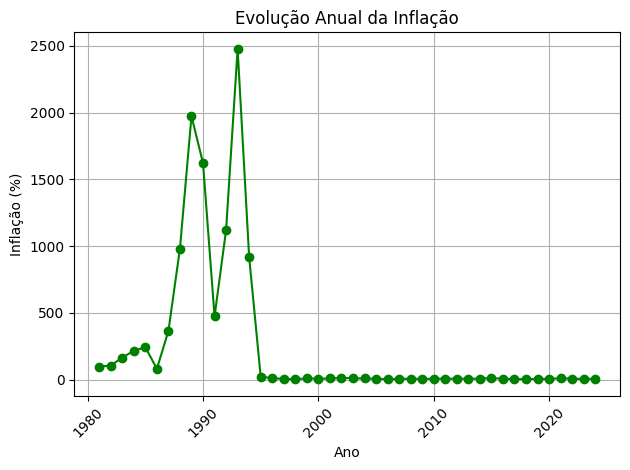

In [48]:
inflacao_anual = Inflacao[(Inflacao['Ano'] > 1980) & (Inflacao['Ano'] < 2025)]

plt.plot(inflacao_anual['Ano'], inflacao_anual['Inflação (%)'], marker='o', linestyle='-', color='green')
plt.title('Evolução Anual da Inflação')
plt.xlabel('Ano')
plt.ylabel('Inflação (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

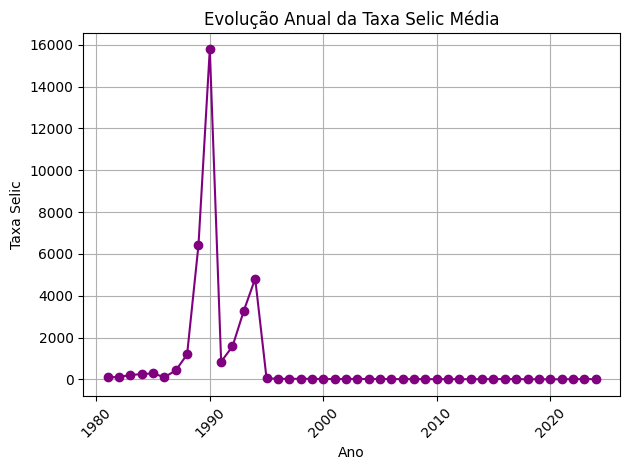

In [32]:
selic_anual = dados_selic
selic_anual['Data'] = selic_anual['Data'].astype(str)
selic_anual['Ano'] = selic_anual['Data'].apply(lambda x: int(x.split('.')[0]))
selic_anual = selic_anual.drop('Data', axis = 1)
selic_anual = selic_anual.groupby('Ano')['Taxa Selic'].mean().reset_index()
selic_anual = selic_anual[(selic_anual['Ano'] > 1980) & (selic_anual['Ano'] < 2025)]

plt.plot(selic_anual['Ano'], selic_anual['Taxa Selic'], marker='o', linestyle='-', color='purple')
plt.title('Evolução Anual da Taxa Selic Média')
plt.xlabel('Ano')
plt.ylabel('Taxa Selic')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Por Que Taxas Tão Altas Antes dos anos 2000?**

Antes dos anos 2000, principalmente antes de 1994, a hiperinflação era algo constante e impactante no Brasil, sendo causada por:

*   Governo gastando demais e imprimindo dinheiro para pagar as contas.
*   Tudo na economia (preços, salários) sendo automaticamente reajustado pela inflação passada, criando um ciclo vicioso.

Nesse cenário, as taxas de juros (como a Selic) eram altíssimas apenas para tentar proteger o dinheiro da rápida perda de valor pela inflação. Eram mais um sintoma da doença do que uma ferramenta de controle eficaz, pois a inflação era estrutural.

**Novo espaço temporal:**
O ponto de virada da economia brasileira ocorreu com O Plano Real (1994). Essa estratégia multifacetada combateu a inflação em suas raízes, atuando em frentes como o ajuste fiscal, a desindexação da economia (com a URV) e a introdução de uma nova moeda (o Real) com forte credibilidade. Temdo isso em mente, buscando uma análise mais recente e adequada, restringiremos nosso espaço temporal das tabelas aos anos posteriores a 2000, considerando alguns anos após a criação do Plano Real, visto que o país precisou se estabilizar.

In [54]:
inflacao_anual = inflacao_anual[(inflacao_anual['Ano'] > 1999) & (inflacao_anual['Ano'] < 2025)].reset_index(drop=True)
selic_anual = selic_anual[(selic_anual['Ano'] > 1999) & (selic_anual['Ano'] < 2025)].reset_index(drop=True)

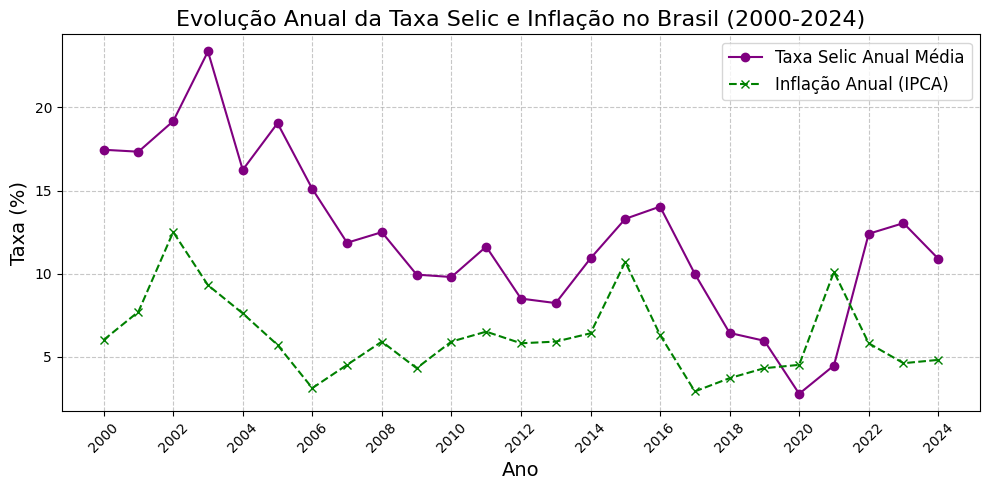

In [65]:
selic_anual['Ano'] = selic_anual['Ano'].astype(int)
inflacao_anual['Ano'] = inflacao_anual['Ano'].astype(int)
selic_anual['Taxa Selic'] = selic_anual['Taxa Selic'].astype(float)
inflacao_anual['Inflação (%)'] = inflacao_anual['Inflação (%)'].astype(float)

#juntando os dfs
selic_inflacao = pd.merge(selic_anual, inflacao_anual, on='Ano')

plt.figure(figsize=(10, 5))
plt.plot(selic_inflacao['Ano'], selic_inflacao['Taxa Selic'],
         label='Taxa Selic Anual Média', marker='o', linestyle='-', color='purple')
plt.plot(selic_inflacao['Ano'], selic_inflacao['Inflação (%)'],
         label='Inflação Anual (IPCA)', marker='x', linestyle='--', color='green')

plt.title('Evolução Anual da Taxa Selic e Inflação no Brasil (2000-2024)', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Taxa (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(selic_inflacao['Ano'][::2], rotation=45)
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.show()

In [66]:
selic_inflacao

,Ano,Taxa Selic,Inflação (%)
0,2000,17.454669,6.0
1,2001,17.336973,7.7
2,2002,19.175277,12.5
3,2003,23.374688,9.3
4,2004,16.242795,7.6
...,...,...,...
20,2020,2.758037,4.5
21,2021,4.460969,10.1
22,2022,12.394302,5.8
23,2023,13.035626,4.6


Correlação entre a Taxa Selic e a Inflação (normalizada): 0.40


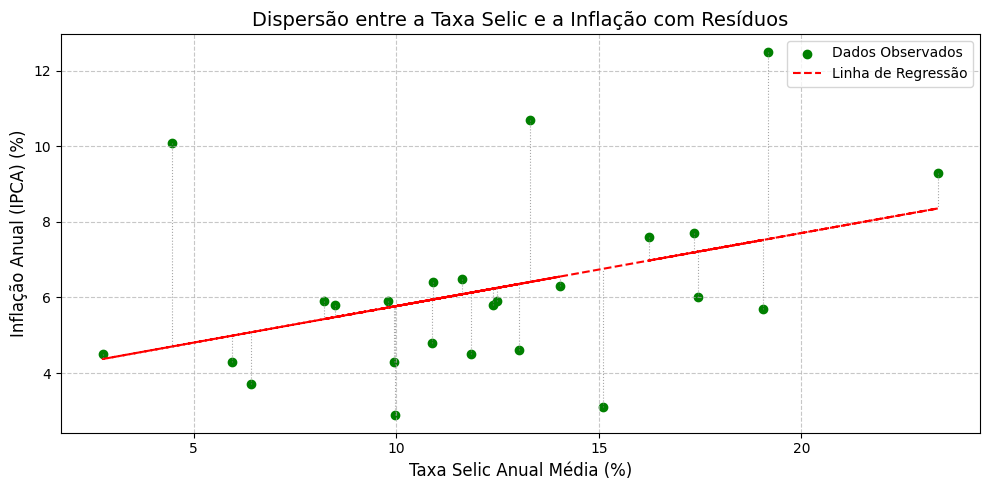

In [73]:
selic_inflacao['Taxa Selic Normalizada'] = (selic_inflacao['Taxa Selic'] - selic_inflacao['Taxa Selic'].mean()) / selic_inflacao['Taxa Selic'].std()
selic_inflacao['Inflação (%) Normalizada'] = (selic_inflacao['Inflação (%)'] - selic_inflacao['Inflação (%)'].mean()) / selic_inflacao['Inflação (%)'].std()

correlacao = selic_inflacao['Taxa Selic Normalizada'].corr(selic_inflacao['Inflação (%) Normalizada'])
print(f'Correlação entre a Taxa Selic e a Inflação (normalizada): {correlacao:.2f}')

x = selic_inflacao['Taxa Selic']
y = selic_inflacao['Inflação (%)']

m, b = np.polyfit(x, y, 1)

y_predito = m * x + b

plt.figure(figsize=(10, 5))

plt.scatter(x, y, color='green', label='Dados Observados')

plt.plot(x, y_predito, color='red', linestyle='--', label='Linha de Regressão')

for i in range(len(x)):
    plt.plot([x.iloc[i], x.iloc[i]], [y.iloc[i], y_predito.iloc[i]],
             color='gray', linestyle=':', linewidth=0.8, alpha=0.7)

plt.xlabel('Taxa Selic Anual Média (%)', fontsize=12)
plt.ylabel('Inflação Anual (IPCA) (%)', fontsize=12)
plt.title('Dispersão entre a Taxa Selic e a Inflação com Resíduos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

####**Por que a Correlação Pode ser "Baixa" (0.40)?**

Uma correlação linear de Pearson de 0.40 indica uma correlação linear positiva moderada, não uma correlação fraca. Isso significa que, quando a Selic sobe, a inflação tende a subir um pouco, e vice-versa. Mas por que não é mais forte, como 0.8 ou 0.9?

A relação entre Selic e inflação não é um simples "causa e efeito" imediato e perfeitamente linear, por várias razões:


*   **Defasagem Temporal (Lags):** A política monetária age com defasagem. Quando o Banco Central aumenta a Selic para combater a inflação, os efeitos na economia (redução do consumo, desaquecimento da produção) levam tempo para aparecer, geralmente de 6 a 18 meses. Portanto, a inflação que o BC está combatendo hoje é a do passado recente, e a Selic de hoje afetará a inflação futura. Se você correlaciona a Selic de um ano com a inflação do mesmo ano, essa defasagem mascara a verdadeira relação.
*   **A inflação é multifatorial:** Justamente como próposito do nosso trabalho, queremos abordar a relçao da Selic com diversos parâmetros, sendo esperado esta seja afetada e afete mais fatores, não sendo determinada apenas pela inflação.